<a href="https://colab.research.google.com/github/quetion/time_series_11202/blob/main/%5B6%5DARCH%E4%BC%B0%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARCH 模型
## 波動率建模
- 建構時間序列波動率模型
- 考慮AR(1)模型
- 可推算出$y_{t+1}$在時間$t$的條件期望值
- 也可推算$y_{t+1}$在時間$t$的條件變異數
## 問題
- 上述方法的波動率不會隨時間變動而變動
- 波動率的特性
  - time-varying volatility
  - volatility clustering
- 此外, 報酬率通常呈現厚尾



In [8]:
# 安裝套件
!pip install arch

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
# arch套件
from arch import arch_model

In [10]:
# 傳統建立波動率的方式
data = yf.download('^gspc',start='2020-01-01')
data.index = pd.to_datetime(data.index)
data = data[['Adj Close']]
data.columns = ['price_spx']
data['ret_spx'] = data.price_spx.pct_change()

[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-2fa212426b7e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ret_spx'] = data.price_spx.pct_change()


<Axes: xlabel='Date'>

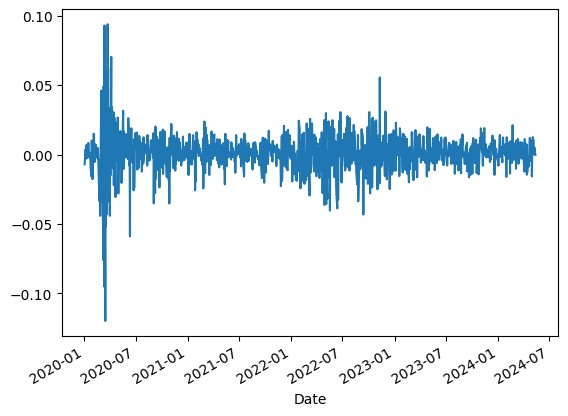

In [14]:
# 建構波動率
#data.price_spx.plot()
data.ret_spx.plot()

In [30]:
data.ret_spx.dropna().std()
data.ret_spx.describe()
data.ret_spx.kurt() # kurtosis 峰態＝12.465 >3 => 厚尾


12.465449179420883

In [27]:
data['2024':'2024'].ret_spx.dropna().std()*np.sqrt(252)
# 大盤波動率: 22.28%
# 2020年 大盤波動率: 34.49%
# 2021年 大盤波動率: 13.10%
# 2022年 大盤波動率: 24.17%
# 2023年 大盤波動率: 13.09%
# 2024年 大盤波動率: 11.61%
#data.ret_spx.mean()*252
# 年化報酬率: 13.33%

0.11612967892829182

In [31]:
# 將報酬率放入arch_model(指定garch)
result = arch_model(data.ret_spx.dropna(),p=1,q=1).fit() # GARCH(p,q)
print(result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9.921523231441414e+19
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4211654306440.328
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2.7517866644353972e+16
Iteration:      4,   Func. Count:     46,   Neg. LLF: 159396.80870117393
Iteration:      5,   Func. Count:     57,   Neg. LLF: 26581775.54480519
Iteration:      6,   Func. Count:     69,   Neg. LLF: 1540478756071944.0
Iteration:      7,   Func. Count:     84,   Neg. LLF: 9.604795792586295e+18
Iteration:      8,   Func. Count:     95,   Neg. LLF: -3408.318517865974
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3408.3185145245316
            Iterations: 12
            Function evaluations: 95
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                ret_spx   R-squared:                       0.000
Mean Model:             Constant Mean   

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001968. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [40]:
# 估計每日條件波動率
vol_garch = result.conditional_volatility
vol_gg = np.sqrt(vol_garch)*100

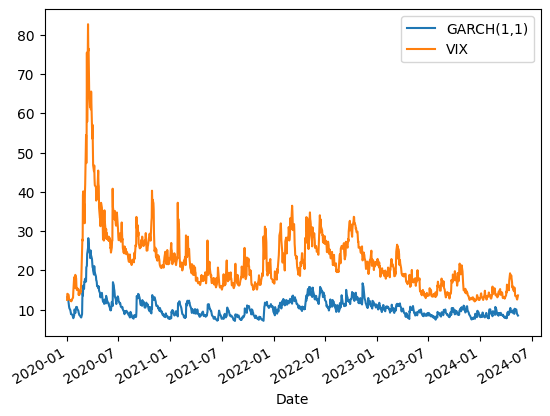

In [41]:
#vol_garch.plot()
#vix.plot()
# 把vol_garch, vix畫在同一張圖上
vol_gg.plot(label='GARCH(1,1)')
vix.vix.plot(label='VIX')
plt.legend()


In [47]:
vol_gg.tail()
vix_gg = vix.vix
vix_gg.head()

Date
2020-01-02    12.47
2020-01-03    14.02
2020-01-06    13.85
2020-01-07    13.79
2020-01-08    13.45
Name: vix, dtype: float64

In [48]:
vol_gg.corr(vix_gg)

0.8642624453521779

In [51]:
vol_gg.corr(vol_gg.shift(1))

0.9648004933239331

In [52]:
vix_gg.corr(vix_gg.shift(1))

0.9656287395531682

In [36]:
# benchmark: VIX index
vix = yf.download('^vix',start='2020-01-01')
vix.index = pd.to_datetime(vix.index)
vix = vix[['Adj Close']]
vix.columns = ['vix']

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

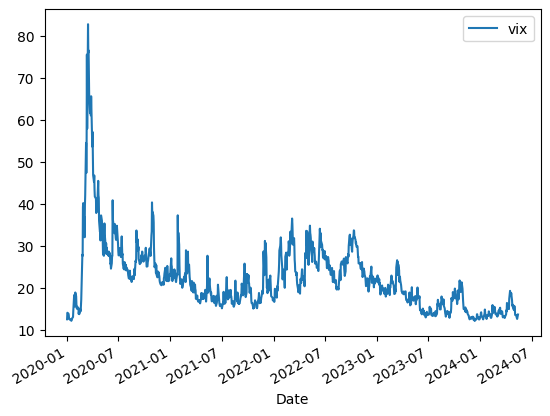

In [37]:
vix.plot()
